In [1]:
import pandas as pd
import os
import numpy as np
import re

from sklearn.ensemble import RandomForestClassifier

    #畫圖
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

    #分資料
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
    #看準確度
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

    # import warnings filter
from warnings import simplefilter
    # ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

#from matplotlib.colors import ListedColormap
print("Setup Complete")

Setup Complete


In [2]:
#read data
path =".\project1.csv"
data = pd.read_csv(path)
data.head()

,Name,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,...,HBP,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,Year,CY
0,Roy Halladay\hallaro01,33,PHI,NL,21,10,0.677,2.44,33,33,...,6,167,3.01,1.041,8.3,0.9,1.1,7.9,2010,1
1,Felix Hernandez\hernafe02,24,SEA,AL,13,12,0.520,2.27,34,34,...,8,174,3.04,1.057,7.0,0.6,2.5,8.4,2010,1
2,CC Sabathia*\sabatc.01,29,NYY,AL,21,7,0.750,3.18,34,34,...,7,136,3.54,1.191,7.9,0.8,2.8,7.5,2010,1
3,Chris Carpenter\carpech01,35,STL,NL,16,9,0.640,3.22,35,35,...,13,120,3.69,1.179,8.2,0.8,2.4,6.9,2010,0
4,Dan Haren\harenda01,29,TOT,MLB,12,12,0.500,3.91,35,35,...,5,106,3.71,1.272,9.4,1.2,2.1,8.3,2010,0


In [3]:
drop_l = data[(data.Lg=='MLB')].index.tolist()
print(drop_l)

[4, 28, 36, 39, 159, 179, 236, 253, 274, 299, 316, 318, 322, 333, 340, 352, 421, 445, 463, 489, 505, 513, 522, 544, 549, 568, 577, 611, 613, 654, 666, 739, 763, 783, 792, 793, 811, 860, 863, 867, 892, 905, 926, 981, 984, 1038, 1081, 1084, 1096, 1104, 1136, 1170, 1189]


In [4]:
#MLB clearance
data_cleaned = data.drop(index=drop_l)

In [5]:
#encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_le = data_cleaned
data_le['Lg'] = labelencoder.fit_transform(data_le['Lg'])
data_le

,Name,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,...,HBP,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,Year,CY
0,Roy Halladay\hallaro01,33,PHI,1,21,10,0.677,2.44,33,33,...,6,167,3.01,1.041,8.3,0.9,1.1,7.9,2010,1
1,Felix Hernandez\hernafe02,24,SEA,0,13,12,0.520,2.27,34,34,...,8,174,3.04,1.057,7.0,0.6,2.5,8.4,2010,1
2,CC Sabathia*\sabatc.01,29,NYY,0,21,7,0.750,3.18,34,34,...,7,136,3.54,1.191,7.9,0.8,2.8,7.5,2010,1
3,Chris Carpenter\carpech01,35,STL,1,16,9,0.640,3.22,35,35,...,13,120,3.69,1.179,8.2,0.8,2.4,6.9,2010,0
5,Adam Wainwright\wainwad01,28,STL,1,20,11,0.645,2.42,33,33,...,4,160,2.86,1.051,7.3,0.6,2.2,8.3,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,Adrian Houser\housead01,26,MIL,1,6,7,0.462,3.72,35,18,...,5,120,3.88,1.240,8.2,1.1,3.0,9.5,2019,0
1195,Pablo Lopez\lopezpa01,23,MIA,1,5,8,0.385,5.09,21,21,...,11,83,4.28,1.240,9.0,1.2,2.2,7.7,2019,0
1196,Gabriel Ynoa\ynoaga01,26,BAL,0,1,10,0.091,5.61,36,13,...,3,84,6.20,1.373,10.2,2.4,2.1,5.4,2019,0
1197,Aaron Brooks\brookaa01,29,TOT,0,6,8,0.429,5.65,29,18,...,10,81,5.40,1.382,9.7,1.7,2.8,6.7,2019,0


In [6]:
#建立X,y並分好train,test data
drop_column = ['Name','Tm','W','L','CY']
X = data_le.drop(drop_column, axis= 1)
y = data_le.CY

In [7]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= 0.3, random_state = 1)

In [8]:
rfc0 = RandomForestClassifier(random_state = 42,oob_score="True")
rfc0.fit(train_X,train_y)
pred_y0 = rfc0.predict(test_X)

acc0 = accuracy_score(test_y, pred_y0)
print('train accuracy :',accuracy_score(train_y,rfc0.predict(train_X)))
print('validation accuracy :',acc0)
print('oob score :',rfc0.oob_score_)

train accuracy : 1.0
validation accuracy : 0.9651162790697675
oob score : 0.9688279301745636


<Figure size 432x288 with 0 Axes>

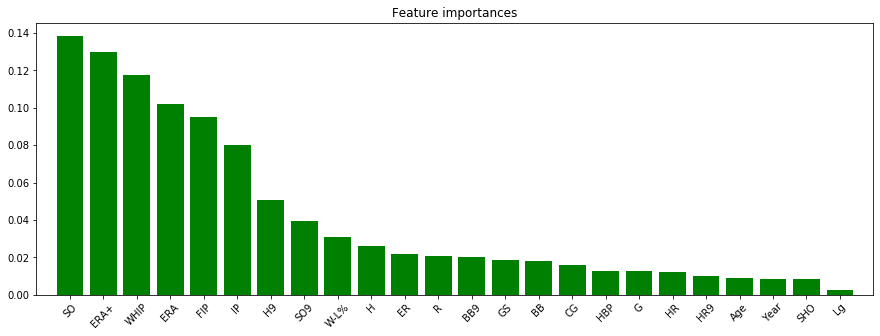

In [9]:
#特征重要度
features = list(X.columns)
importances = rfc0.feature_importances_
indices = np.argsort(importances)[::-1]
num_features = len(importances)
 
#将特征重要度以柱状图展示
plt.figure()
plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(num_features), importances[indices], color="g", align="center")
plt.xticks(range(num_features), [features[i] for i in indices], rotation='45')
plt.xlim([-1, num_features])
plt.show()

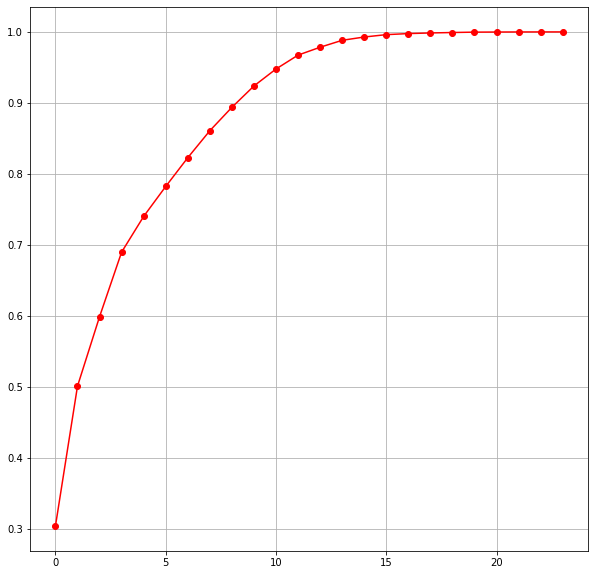

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_sc)

#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [11]:
pca_new = PCA(n_components=9)
X_pca=(pca_new.fit_transform(X_sc))
#print(pca_new.explained_variance_ratio_)
#print(pca_new.explained_variance_)

In [12]:
train_X, test_X, train_y, test_y = train_test_split(X_pca, y, test_size= 0.3, random_state = 42)

In [13]:
#只PCA 不調參數model
rfc1 = RandomForestClassifier(random_state = 42,oob_score="True")
rfc1.fit(train_X,train_y)
pred_y1 = rfc1.predict(test_X)

acc1 = accuracy_score(test_y, pred_y1)
print('train accuracy :',accuracy_score(train_y,rfc1.predict(train_X)))
print('validation accuracy :',acc1)
print('oob score :',rfc1.oob_score_)

train accuracy : 1.0
validation accuracy : 0.9680232558139535
oob score : 0.9650872817955112


0.9680232558139535 59


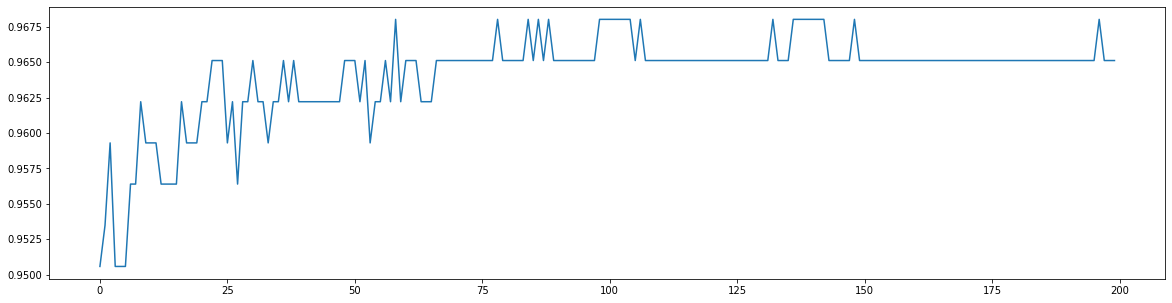

In [14]:
acc_list = []
for i in range(0,200): #200棵樹
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1,random_state = 42).fit(train_X,train_y)
    pred_y = rfc.predict(test_X)
    
    acc = accuracy_score(test_y, pred_y)
    acc_list.append(acc)

print(max(acc_list),acc_list.index(max(acc_list))+1)

plt.figure(figsize=[20,5])
plt.plot(range(0,200),acc_list)
plt.show()

In [53]:
#對 max_depth search
p1= {'max_depth':range(2,20,1)}
rfc_g1= GridSearchCV(estimator = RandomForestClassifier(random_state=42,
                                                        n_estimators=85),
                     param_grid =p1,
                     scoring='accuracy',
                     cv=5).fit(train_X,train_y)

#pd.DataFrame(rfc_g1.cv_results_).sort_values('rank_test_score')
print(rfc_g1.best_params_)
print('grid search best score :',rfc_g1.best_score_)
pd.DataFrame(rfc_g1.cv_results_).sort_values('rank_test_score')

{'max_depth': 10}
grid search best score : 0.967608695652174


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.101726,0.001669,0.005984,7.294206e-07,10,{'max_depth': 10},0.956522,0.956522,0.98750,0.95625,0.98125,0.967609,0.013832,1
15,0.102124,0.002053,0.006182,3.993074e-04,17,{'max_depth': 17},0.956522,0.956522,0.98750,0.95625,0.98125,0.967609,0.013832,1
14,0.102525,0.002386,0.005985,6.868773e-06,16,{'max_depth': 16},0.956522,0.956522,0.98750,0.95625,0.98125,0.967609,0.013832,1
13,0.102531,0.002113,0.005984,3.551076e-06,15,{'max_depth': 15},0.956522,0.956522,0.98750,0.95625,0.98125,0.967609,0.013832,1
12,0.101924,0.001818,0.005985,2.581094e-06,14,{'max_depth': 14},0.956522,0.956522,0.98750,0.95625,0.98125,0.967609,0.013832,1
11,0.101931,0.002030,0.006579,4.867080e-04,13,{'max_depth': 13},0.956522,0.956522,0.98750,0.95625,0.98125,0.967609,0.013832,1
10,0.102315,0.002141,0.005982,1.655937e-06,12,{'max_depth': 12},0.956522,0.956522,0.98750,0.95625,0.98125,0.967609,0.013832,1
9,0.102925,0.003178,0.006381,4.906563e-04,11,{'max_depth': 11},0.956522,0.956522,0.98750,0.95625,0.98125,0.967609,0.013832,1
17,0.102921,0.002982,0.005984,5.352484e-07,19,{'max_depth': 19},0.956522,0.956522,0.98750,0.95625,0.98125,0.967609,0.013832,1
16,0.101932,0.001830,0.006383,4.878638e-04,18,{'max_depth': 18},0.956522,0.956522,0.98750,0.95625,0.98125,0.967609,0.013832,1


In [55]:
rfc2 = RandomForestClassifier(random_state = 42,
                              oob_score="True",
                              n_estimators=85,
                             max_depth = 19)
rfc2.fit(train_X,train_y)
pred_y2 = rfc2.predict(test_X)

acc2 = accuracy_score(test_y, pred_y2)
print('validation accuracy :',acc2)
print('oob score :',rfc2.oob_score_)

validation accuracy : 0.9680232558139535
oob score : 0.9638403990024937


In [56]:
#對 'max_depth':range(3,14,2), 'min_samples_split':range(50,201,20)
p2= {'min_samples_split':range(2,31,1),'criterion':['gini', 'entropy']}
rfc_g2= GridSearchCV(estimator = RandomForestClassifier(random_state = 42,
                                                        n_estimators = 85,
                                                        max_depth =19),
                     param_grid =p2,
                     scoring='accuracy',
                     cv=5).fit(train_X,train_y)

#pd.DataFrame(rfc_g2.cv_results_).sort_values('rank_test_score')
print(rfc_g2.best_params_)
print('grid search best score :',rfc_g2.best_score_)

{'criterion': 'gini', 'min_samples_split': 2}
grid search best score : 0.967608695652174


In [62]:
model = RandomForestClassifier(random_state = 42,
                              oob_score="True",
                              n_estimators=85,
                              max_depth=19,
                              criterion='gini',
                              min_samples_split=2)
model.fit(train_X,train_y)
fpred_y = model.predict(test_X)

facc = accuracy_score(test_y, fpred_y)
print('validation accuracy :',facc)
print('oob score :',model.oob_score_)

validation accuracy : 0.9680232558139535
oob score : 0.9638403990024937


In [33]:
#畫confusion matrix的code
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(confusion_matrix, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(20, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim(len(cm) - 0.5, -0.5)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

Confusion matrix, without normalization


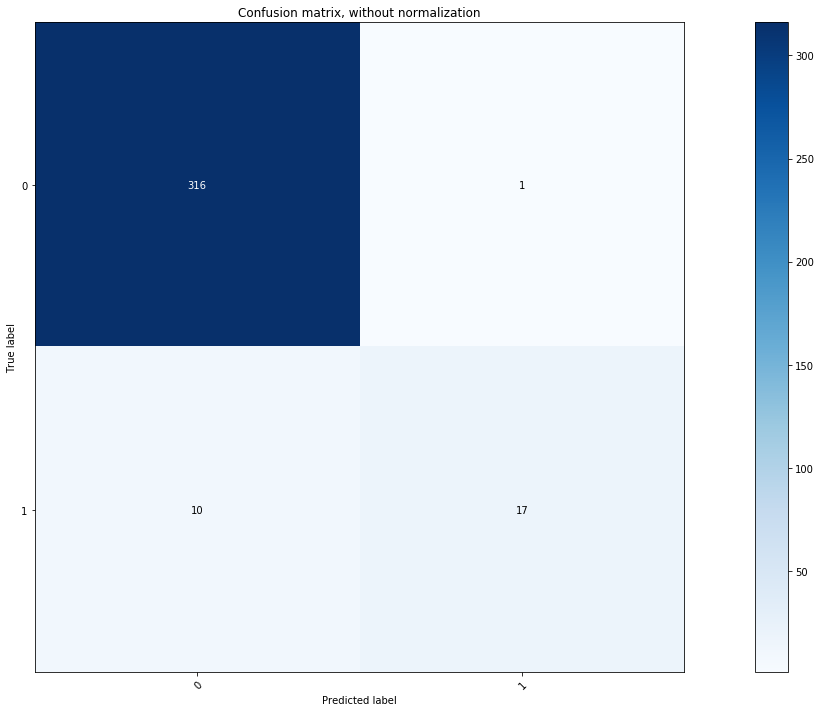

validation accuracy : 0.9680232558139535
oob score : 0.9638403990024937
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       317
           1       0.94      0.59      0.73        27

    accuracy                           0.97       344
   macro avg       0.95      0.79      0.85       344
weighted avg       0.96      0.97      0.96       344



In [63]:
#confusion metrix
cm = confusion_matrix(test_y, fpred_y)
s = ["0","1"]
plot_confusion_matrix(cm, classes=s, normalize=False,title=None,cmap=plt.cm.Blues)
print('validation accuracy :',facc)
print('oob score :',model.oob_score_)
print(classification_report(test_y, pred_y,target_names=s))

Confusion matrix, without normalization


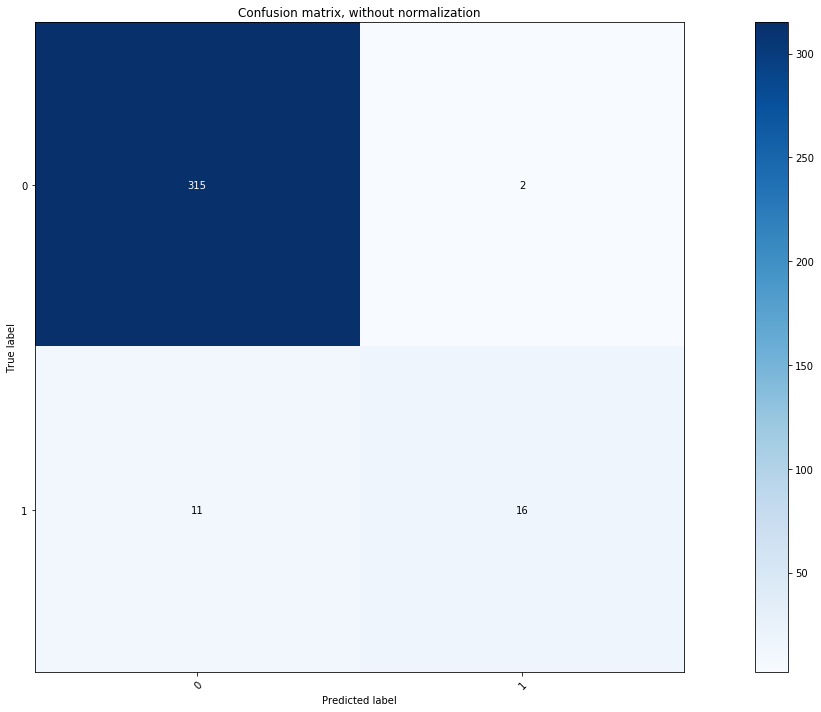

======== random_state = 1 ========
validation accuracy : 0.9622093023255814
oob score : 0.9600997506234414
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       317
           1       0.94      0.59      0.73        27

    accuracy                           0.97       344
   macro avg       0.95      0.79      0.85       344
weighted avg       0.96      0.97      0.96       344
 

Confusion matrix, without normalization


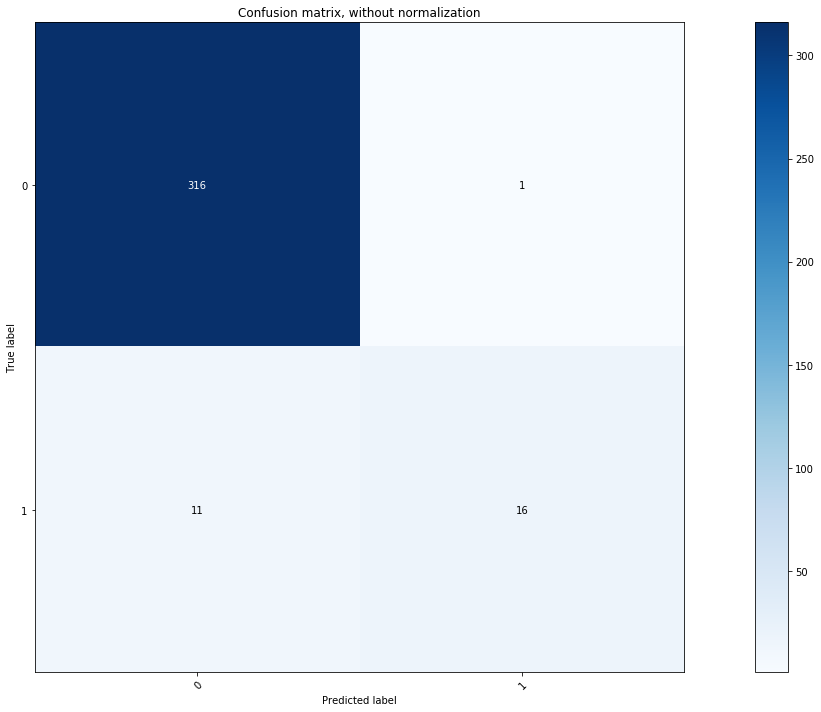

======== random_state = 34 ========
validation accuracy : 0.9651162790697675
oob score : 0.9625935162094763
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       317
           1       0.94      0.59      0.73        27

    accuracy                           0.97       344
   macro avg       0.95      0.79      0.85       344
weighted avg       0.96      0.97      0.96       344
 

Confusion matrix, without normalization


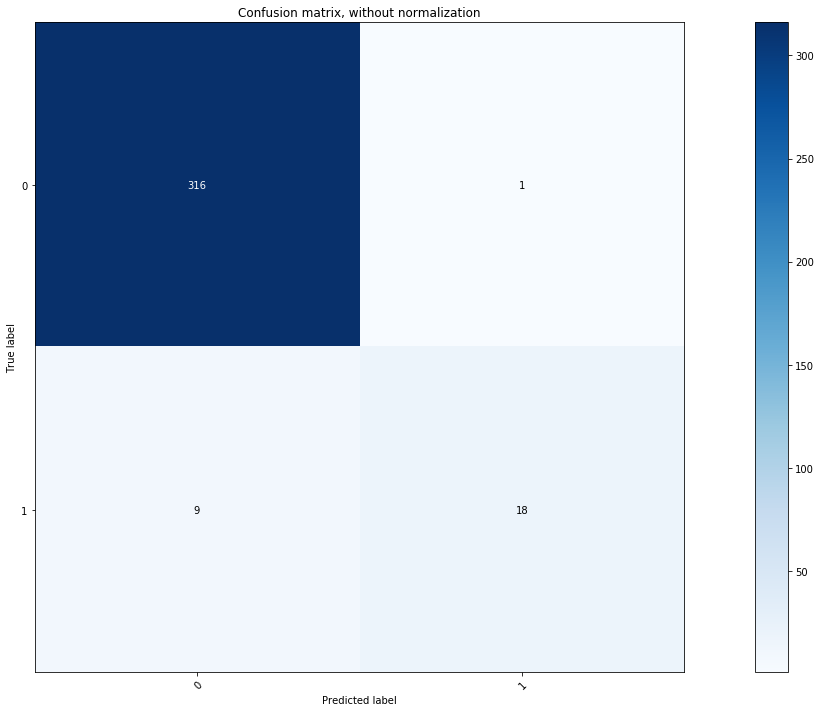

======== random_state = 99 ========
validation accuracy : 0.9709302325581395
oob score : 0.9613466334164589
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       317
           1       0.94      0.59      0.73        27

    accuracy                           0.97       344
   macro avg       0.95      0.79      0.85       344
weighted avg       0.96      0.97      0.96       344
 

Confusion matrix, without normalization


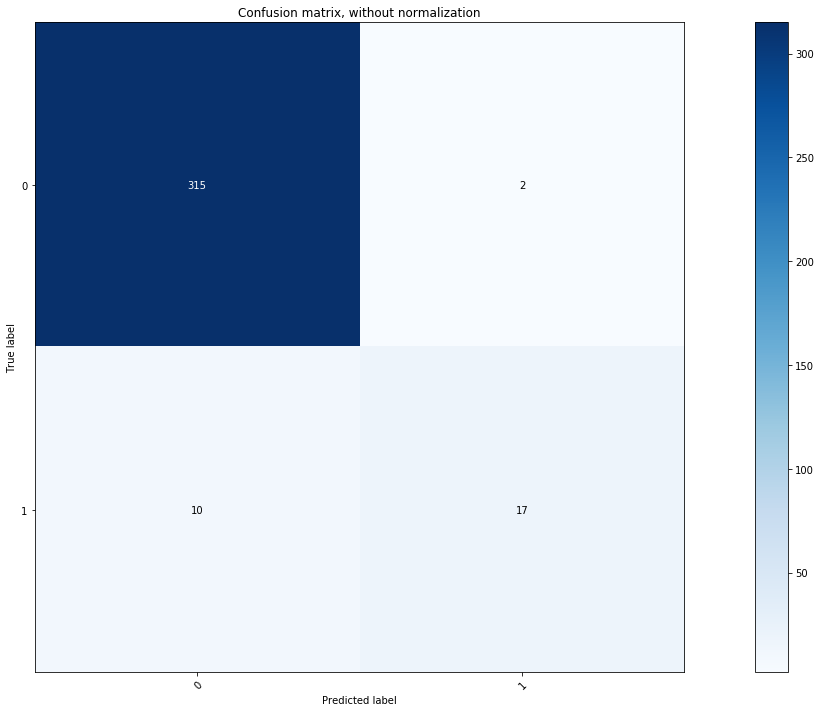

======== random_state = 147 ========
validation accuracy : 0.9651162790697675
oob score : 0.9638403990024937
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       317
           1       0.94      0.59      0.73        27

    accuracy                           0.97       344
   macro avg       0.95      0.79      0.85       344
weighted avg       0.96      0.97      0.96       344
 

Confusion matrix, without normalization


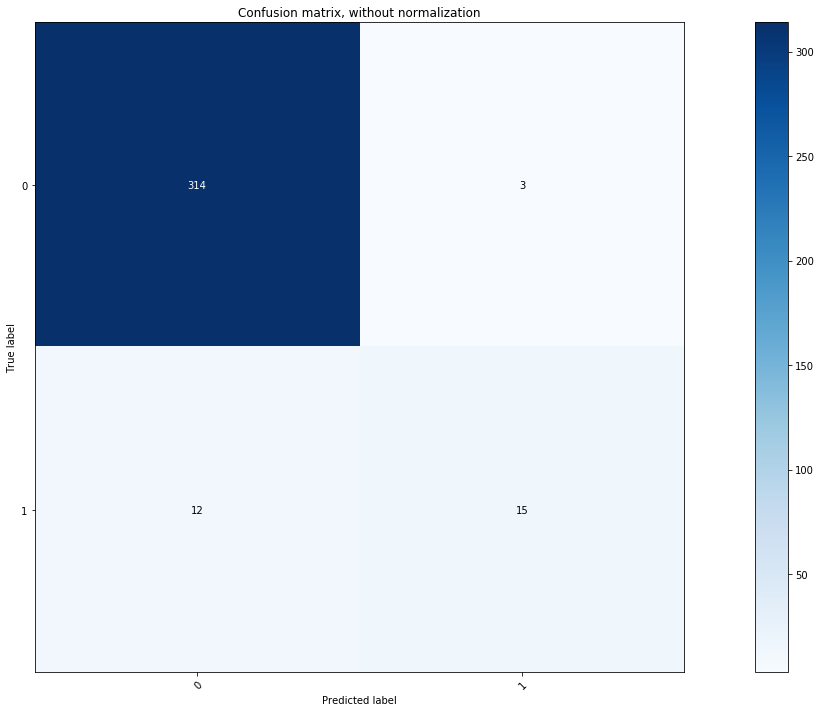

======== random_state = 158 ========
validation accuracy : 0.9563953488372093
oob score : 0.9688279301745636
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       317
           1       0.94      0.59      0.73        27

    accuracy                           0.97       344
   macro avg       0.95      0.79      0.85       344
weighted avg       0.96      0.97      0.96       344
 



In [65]:
for i in [1,34,99,147,158]:
    random_model = RandomForestClassifier(random_state = i,
                                  oob_score="True",
                                  n_estimators=85,
                                  max_depth=19,
                                  criterion='gini',
                                  min_samples_split=2)
    random_model.fit(train_X,train_y)
    random_fpred_y = random_model.predict(test_X)

    random_facc = accuracy_score(test_y, random_fpred_y)
    
    cm = confusion_matrix(test_y, random_fpred_y)
    plot_confusion_matrix(cm, classes=s, normalize=False,title=None,cmap=plt.cm.Blues)
    print('========','random_state =',i,'========')
    print('validation accuracy :',random_facc)
    print('oob score :',random_model.oob_score_)
    print(classification_report(test_y, pred_y,target_names=s),'\n')